## Notebook to explore the features of the dataset

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Data location

In [2]:
solar_panel_data = '../data/solar_production.csv'

# open
with open(solar_panel_data) as csv_file:
    # open with pandas
    fields = ['time', 'value']
    solar_panel_df = pd.read_csv(csv_file, sep=',', usecols=fields)
    print(solar_panel_df.head())

# column names: 
# name,tags,time,calculation_mode_str,device_class_str,domain,entity_id,friendly_name,friendly_name_str,icon_str,integration_str,source_domain_str,source_entity_str,state_class_str,value
# timestamps: 
#   Friday 26 February 2021 16:34:30.880 - Friday 1 July 2022 18:31:03.327 (GMT)

                  time   value
0  1614357270880641024  126.94
1  1614357300880275968  120.16
2  1614357330890898944  115.41
3  1614357360889511168  116.68
4  1614357390889285120  123.69


Make test plot of some of the data

Sampling interval =  30


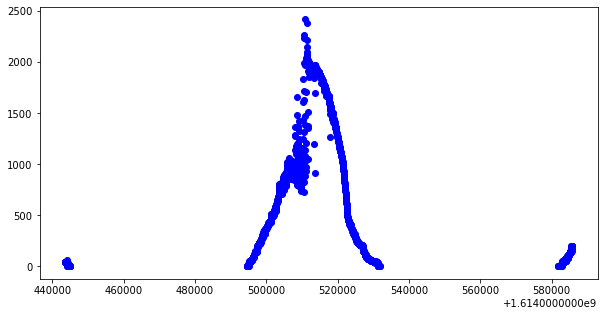

In [3]:
x = solar_panel_df['time']
y = solar_panel_df['value']

# convert to numpy
# convert nanoseconds --> seconds
x = np.array(x / 1e9, dtype=np.uint32)
y = np.array(y, dtype=np.float32)

print("Sampling interval = ", x[58] - x[57])

# pick samples 0 - 2000
x_plot = x[1200:2600]
y_plot = y[1200:2600]

# plot some range of the data
plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot, 'bo')


Figure out where the gaps are in the data

In [6]:
# loop over all the data and calculate the time gap between samples
for i in range(len(x) - 1):
    gap = x[i + 1] - x[i]
    
    # if the gap is not 30 seconds, print the gap
    if gap > 300:
        timestamp = datetime.utcfromtimestamp(x[i]).strftime('%Y-%m-%d %H:%M:%S')
        # print(f"Gap between samples: {i}:{gap} at {timestamp}")

